<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/TransferLearningInKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem with training our own model-**

1) Deep learninig/Neural Network is data hungry which means it requires large amount of data.If you want to build cat vs dag image classifier then you huge amount of cat and dog images to train the model such that the data should be labelled.So collecting such huge amount of data is not at all easy.

2)Training a deep learninig model requires more time when we train the model on big data. Time might go to days and weeks which is not at all desired.

3)Pre-Trained model is such model which is trained on the huge data and we can make use of this model for our use case.

4)Let we are  building a deep learning model of classifying phone and tablet images.We decided that we will make use of pre-trained model of lets say VGG16 which is trained on ImageNet dataset. But what if there is no class of phone and tablet images ,so if we use this VGG16 model for our use case wherein our classes is not trained on the model resulting in less accuracy on our use-case.This is the problem that we have solve by using transfer learning.

**Transfer Learning-**

We learn cycle first before learning gear bike because cycle riding makes it easy for us to learn gear bike. This is the concept of Transfer Learning.

Transfer Learning is a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.



**How does Transfer Learning Work-**

Let we have a problem of image classification of cat and dog. We will use pre-trained model of VGG16 which is trained on ImageNet data to solve our problem of cat and dog image classification. There are 2 parts in VGG16 neural network architecture,one is convolutional layer part and second is combination of fully connected layer and output layer.Convolution layer part takes the spacial information from input image and fully connected part classifies the image. Consider that we dont have cat and dog class in ImageNet dataset which means the model of VGG16 is unaware of the images of cat and dog , VGG16 is not trained on cat and dog images.


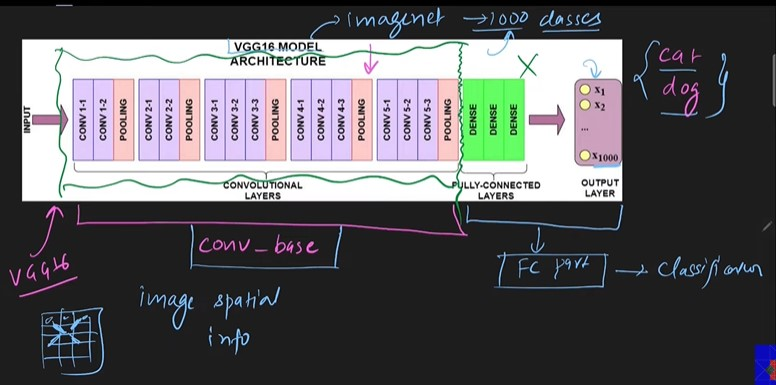

Now to apply Transfer Learning what we do is we keep the convolutional layer from the model of VGG16 and ignore the fully connected layer.So now we have convolutional layer of VGG16 and we will add our own dense layer/fully connected layer as our own and we put output layer with one neuron having single output with sigmoid activation function because we are having binary classification problem.We freeze the convolutional layer of VGG16 so that when we train the whole model , only fully connected layer will train and this convolutional layer wont train resulting in less time of training.So as a result we have used the pre-trained model of VGG16 for our use case with the help of transfer learning.

**Why Transfer Learning Works?**

SO now we replaced the fully connected layer from pre-trained model of VGG16 and added our own fully connected layer to convolutional layer of VGG16 and train the new model resulting in less time for training.SO whatever convolutional layer we add in a CNN model , the task of convolutional layer is to decode the image and extract the feature of the input image.Early layers in convolutional layer extracts the premitive features like edges and as you go deep in convolutional layer , more detailed features are extracted like shape and size of the object in image.As we are using pre-trained model of VGG16 which is trained on imagenet dataset that has 1000 classes which means this VGG16 model is trained on 1000 different classes. So the premitive features of all these 1000 classes will be same for all other classes of image which it has not been trained on.Like there will be edges and shape will be there in common. So learning these premitive features which this VGG16 model is already trained on, we dont have to train our custome model where we added our own fully connected layer from the scratech . We can just train our custome model's fully connected layer and that would be enough to make the prediction on our own problem statement.

The philosophy behind this is that "When wheel is ready , then go make vehicle out of it, dont go again and make wheel."

**How can we apply Transfer Learning-**

1)Feature Extraction-

Feature extraction is nothing but to make use of pretrained model. Exxtract convolutional layer of pre-trained model and add our own fully connected model and train the new model on our own dataset to get prediction.Feature Extraction is generally done when labells in the pre-trained model's dataset and your dataset are same.

2)Fine Tunning-

In Fine Tunning, we dont freeze whole convolutional layer. Instead of it,we freeze only starting convolutional layer , and unfreeze the deep convolutional layer. Then we add our own fully connected deep layer and train the new custome model on owr own dataset.Fine tunning is applied when you are working on such problem wherein your pre-trained model dataset features are very different from the features you want to have a prediction on.

**Now we will build CNN model with the help of Keras which classifies the Dog vs Cat images with the help of Pre-Trained model of VGG16.**

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()
#This code will unzip the dataset

In [4]:
#Importing the dependencies
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
#Creating a object of VGG16 where we define weights,
#and defining what we require from the pre-trained model of VGG16
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
conv_base.summary()
#Last layer is pooling layer and second last layer is conv2D layer

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
#Now defining the model
model = Sequential()
model.add(conv_base) #Here adding the base model to our model
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:
#Before training the custome model, we freeze the convolutional layer of pre-trained model which means we dont train the weights of convolutional layer
conv_base.trainable = False

In [16]:
#We ahve to load images from dataset and send it to the model
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)
#Found 20000 images in training data and found 5000 iages in test data.

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
#Normalizing the image pixels to 0 to 1 from 0 to 255
def process(image,label):
  image = tensorflow.cast(image/255. , tensorflow.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,validation_data=validation_ds,epochs=5)


Epoch 1/5
 87/625 ━━━━━━━━━━━━━━━━━━━━ 1:09:33 8s/step - accuracy: 0.7572 - loss: 0.6035

Training might take more time

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()